In [2]:
import PIL
import cv2 as cv

import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow.keras

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pathlib
data_dir = pathlib.Path('.//BrainDataSet/')
data_dir

WindowsPath('BrainDataSet')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('BrainDataSet/no/no0.jpg'),
 WindowsPath('BrainDataSet/no/no1.jpg'),
 WindowsPath('BrainDataSet/no/no10.jpg'),
 WindowsPath('BrainDataSet/no/no100.jpg'),
 WindowsPath('BrainDataSet/no/no1000.jpg')]

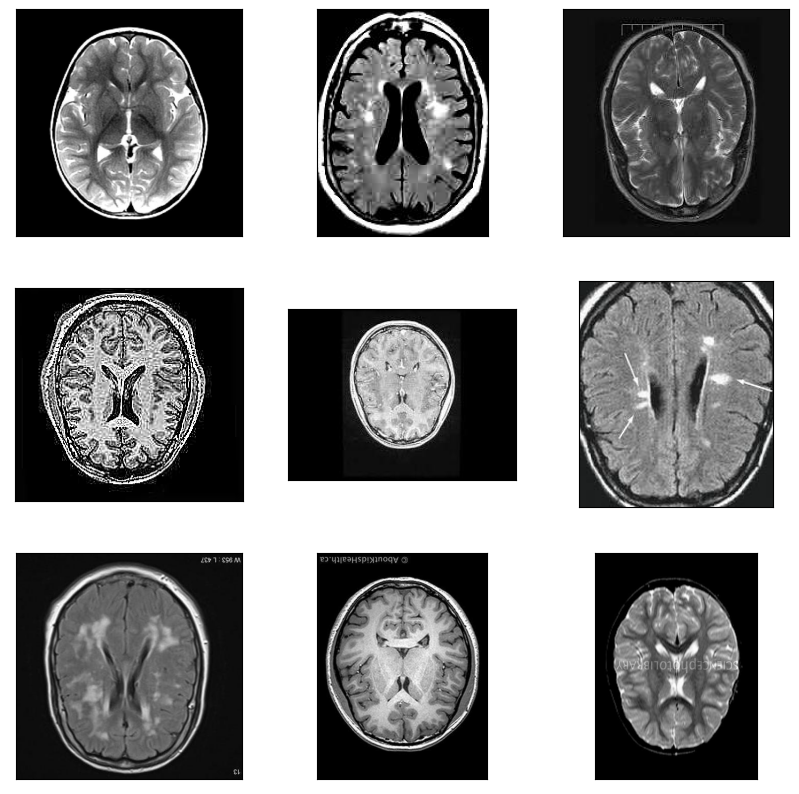

In [11]:
all_Dir_img=list(data_dir.glob('*/*.jpg'))[:9]
Dir_img=[]
for d_img in all_Dir_img:
    img=cv.imread(str(d_img))
    Dir_img.append(img)
    
plt.figure(figsize=(10,10))
for i in range(len(Dir_img)):
    plt.subplot(3,3,i+1),plt.imshow(Dir_img[i],'gray',vmin=0,vmax=255)
#     plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

In [14]:
print('total images are : ',len(list(data_dir.glob('*/*.jpg'))) )
print('total images of -VE_Tumor : ',len(list(data_dir.glob('no/*.jpg'))) )
print('total images of +VE_Tumor : ',len(list(data_dir.glob('yes/*.jpg'))) )

total images are :  3000
total images of -VE_Tumor :  1500
total images of +VE_Tumor :  1500


In [15]:
data_images_dict = {
    'no': list(data_dir.glob('no/*')),
    'yes': list(data_dir.glob('yes/*')),
}

In [16]:

data_label_dict = {
    'no': 0,
    'yes': 1,
}

In [21]:
X,y=[],[]
for class_name , images in data_images_dict.items():
    for image in images:
        img = cv.imread(str(image))
        resize_img = cv.resize(img,(64,64))
        X.append(resize_img)
        y.append(data_label_dict[class_name])

In [36]:
# X and y into numpy array
X=np.array(X)
y=np.array(y)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [40]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize


X_train=normalize(X_train, axis=1)
X_test=normalize(X_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)

In [44]:
len(X_train),len(X_test)

(2100, 900)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Activation, Dropout


In [47]:
INPUT_SIZE=64
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


# Binary CrossEntropy= 1, sigmoid
# Categorical Cross Entryopy= 2 , softmax

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [48]:
model.fit(X_train, y_train, 
batch_size=16, 
verbose=1, epochs=10, 
validation_data=(X_test, y_test),
shuffle=False)

Epoch 1/10
132/132 [==============================] - 36s 249ms/step - loss: 0.5520 - accuracy: 0.7276 - val_loss: 0.5148 - val_accuracy: 0.7333
Epoch 2/10
132/132 [==============================] - 31s 236ms/step - loss: 0.4191 - accuracy: 0.8200 - val_loss: 0.3524 - val_accuracy: 0.8378
Epoch 3/10
132/132 [==============================] - 30s 230ms/step - loss: 0.3174 - accuracy: 0.8576 - val_loss: 0.2866 - val_accuracy: 0.8644
Epoch 4/10
132/132 [==============================] - 32s 245ms/step - loss: 0.2354 - accuracy: 0.9090 - val_loss: 0.2128 - val_accuracy: 0.9322
Epoch 5/10
132/132 [==============================] - 36s 275ms/step - loss: 0.1573 - accuracy: 0.9457 - val_loss: 0.1828 - val_accuracy: 0.9344
Epoch 6/10
132/132 [==============================] - 52s 394ms/step - loss: 0.1015 - accuracy: 0.9667 - val_loss: 0.1349 - val_accuracy: 0.9544
Epoch 7/10
132/132 [==============================] - 45s 337ms/step - loss: 0.0714 - accuracy: 0.9771 - val_loss: 0.1520 - val_ac

In [49]:
model.save("brain_tumor_v1.h5")

In [51]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 4s 144ms/step - loss: 0.1769 - accuracy: 0.9667


[0.17685532569885254, 0.9666666388511658]

In [55]:
history=model.fit(X_train, y_train, 
batch_size=16, 
verbose=1, epochs=10, 
validation_data=(X_test, y_test),
shuffle=False)

Epoch 1/10
132/132 [==============================] - 39s 300ms/step - loss: 0.0078 - accuracy: 0.9995 - val_loss: 0.1185 - val_accuracy: 0.9767
Epoch 2/10
132/132 [==============================] - 39s 293ms/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.1137 - val_accuracy: 0.9756
Epoch 3/10
132/132 [==============================] - 34s 256ms/step - loss: 0.0262 - accuracy: 0.9900 - val_loss: 0.1542 - val_accuracy: 0.9678
Epoch 4/10
132/132 [==============================] - 39s 299ms/step - loss: 0.0200 - accuracy: 0.9948 - val_loss: 0.1122 - val_accuracy: 0.9811
Epoch 5/10
132/132 [==============================] - 40s 301ms/step - loss: 0.0151 - accuracy: 0.9948 - val_loss: 0.1465 - val_accuracy: 0.9689
Epoch 6/10
132/132 [==============================] - 37s 283ms/step - loss: 0.0141 - accuracy: 0.9967 - val_loss: 0.1282 - val_accuracy: 0.9767
Epoch 7/10
132/132 [==============================] - 33s 248ms/step - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.1265 - val_ac

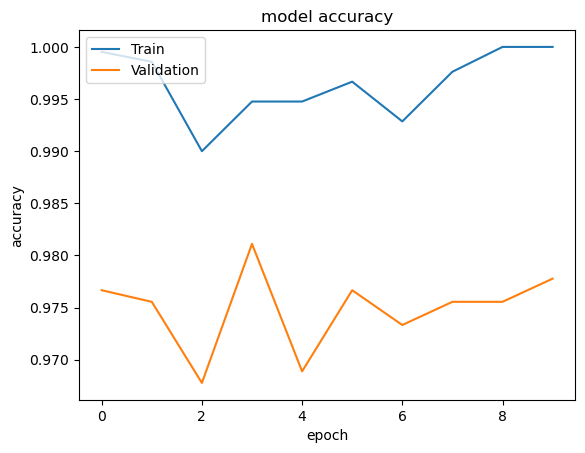

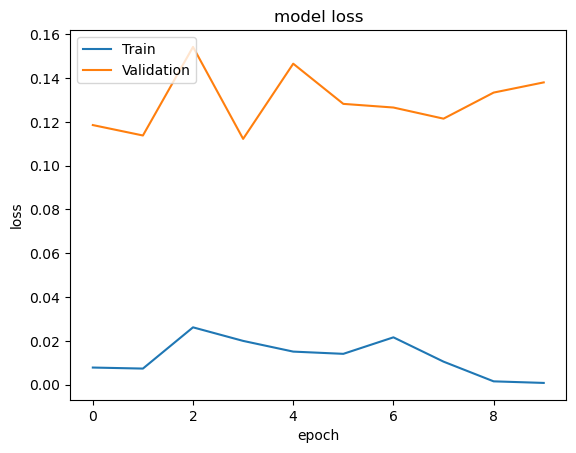

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [60]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

29/29 [==============================] - 5s 158ms/step


In [62]:

# model=load_model('brain_tumor_v1.h5')

image=cv.imread('y9.jpg')

img=Image.fromarray(image)

img=img.resize((64,64))

img=np.array(img)

input_img=np.expand_dims(img, axis=0)

result=model.predict(input_img)
print(result)


1/1 [==============================] - 0s 456ms/step
[[0. 1.]]


In [61]:
classes_x

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [63]:
predict_x

array([[1.0000000e+00, 1.6884184e-15],
       [1.0000000e+00, 2.4927407e-09],
       [4.0484600e-02, 9.5951545e-01],
       ...,
       [9.9999821e-01, 1.8256642e-06],
       [1.0000000e+00, 2.4951772e-08],
       [1.0000000e+00, 3.6887476e-10]], dtype=float32)

In [67]:
score =tf.nn.softmax(predict_x[0])
np.argmax(score)

0

In [68]:
n=np.where(result==1.0)
print('Detected Class :',n[1][0])

Detected Class : 1


In [75]:
img = cv.imread("Pred/pred56.jpg")
resize_img = cv.resize(img,(64,64))
input_img=np.expand_dims(resize_img, axis=0)

result=model.predict(input_img)
n=np.where(result==1.0)
print('Detected Class :',n[1][0])

1/1 [==============================] - 0s 66ms/step
Detected Class : 1


In [ ]:
https://colab.research.google.com/github/pysource7/utilities/blob/master/Train_Mask_RCNN_(DEMO).ipynb#scrollTo=6npLKIL3BqiO

In [ ]:
https://colab.research.google.com/github/pysource7/utilities/blob/master/Run_Mask_RCNN_on_images_(DEMO).ipynb#scrollTo=IlNYqGhvqb_p

In [ ]:
https://pysource.com/2021/08/10/train-mask-r-cnn-for-image-segmentation-online-free-gpu/

In [7]:
import tensorflow as tf
model = tf.keras.models.load_model("brain_tumor_v1.h5")

In [13]:
import numpy as np
import cv2 as cv
img = cv.imread("Pred/pred41.jpg")
resize_img = cv.resize(img,(64,64))
input_img=np.expand_dims(resize_img, axis=0)

result=model.predict(input_img)
n=np.where(result==1.0)
print('Detected Class :',n[1][0])
pred=np.argmax(result)
print(pred)

1/1 [==============================] - 0s 68ms/step
Detected Class : 0
0
